# 파이토치 연습 (딥러닝)

# CIFAR10 CNN(Convolutional Neural Network) 설계

In [ ]:
# 필요한 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
  Device=torch.device('cuda')
else:
  Device=torch.device('cpu')
print("Device :", Device)

Device : cuda


In [ ]:
Batch_size=32
Epochs=10

train_dataset=datasets.CIFAR10(root="../data/CIFAR_10",
                             train=True, #학습용 데이터
                             download=True,
                             transform=transforms.ToTensor())
test_dataset=datasets.CIFAR10(root="../data/CIFAR_10",
                            train=False, #검증용 데이터
                            transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset, 
                                         batch_size=Batch_size,
                                         shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=Batch_size,
                                        shuffle=False)

In [ ]:
for (X_train, y_train) in train_loader:
  print("X_train", X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

X_train torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


In [ ]:
# CNN 모델 설계하기
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1=nn.Conv2d(
        in_channels=3,
        out_channels=8,
        kernel_size=3,
        padding=1
    )
    self.conv2=nn.Conv2d(
        in_channels=8,
        out_channels=16,
        kernel_size=3,
        padding=1
    )
    self.pool=nn.MaxPool2d(
        kernel_size=2,
        stride=2
    )
    self.fc1=nn.Linear(8*8*16, 64)
    self.fc2=nn.Linear(64,32)
    self.fc3=nn.Linear(32,10)
  def forward(self, x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.pool(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=self.pool(x)

    x=x.view(-1, 8*8*16)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    x=F.relu(x)
    x=self.fc3(x)
    x=F.log_softmax(x, dim=1)
    return x

In [ ]:
def train(model, train_loader, optimizier, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image=image.to(Device)
    label=label.to(Device)
    optimizer.zero_grad()
    output=model(image)
    loss=critertion(output, label)
    loss.backward() 
    optimizer.step() 
    if batch_idx % log_interval == 0:
      print(print("Train Epoch: {} [{}/{}({:.0f}%)] \t Train Loss: {:.6f}".format(Epoch, batch_idx*len(image), len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item())))

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for image, label in test_loader:
      image=image.to(Device)
      label=label.to(Device)
      output=model(image)
      test_loss += critertion(output, label).item()
      prediction=output.max(1, keepdim=True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy=100.*correct/len(test_loader.dataset)
  return test_loss, test_accuracy

In [ ]:
model=CNN().to(Device)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
critertion=nn.CrossEntropyLoss()

In [ ]:
print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
for Epoch in range(1, Epochs+1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, test_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)] 	 Train Loss: 2.303736
None
Train Epoch: 1 [6400/50000(13%)] 	 Train Loss: 1.978452
None
Train Epoch: 1 [12800/50000(26%)] 	 Train Loss: 1.555024
None
Train Epoch: 1 [19200/50000(38%)] 	 Train Loss: 1.641877
None
Train Epoch: 1 [25600/50000(51%)] 	 Train Loss: 1.992389
None
Train Epoch: 1 [32000/50000(64%)] 	 Train Loss: 1.504776
None
Train Epoch: 1 [38400/50000(77%)] 	 Train Loss: 1.837329
None
Train Epoch: 1 [44800/50000(90%)] 	 Train Loss: 1.394625
None

 [EPOCH: 1], 	 Test Loss: 0.0512, 	 Test Accuracy: 41.67 

Train Epoch: 2 [0/50000(0%)] 	 Train Loss: 1.635458
None
Train Epoch: 2 [6400/50000(13%)] 	 Train Loss: 1.679198
None
Train Epoch: 2 [12800/50000(26%)] 	 Train Loss: 1.436909
None
Train Epoch: 2 [19200/50000(38%)] 	 Train Loss: 1.394286
None
Train Epoch: 2 [25600/50000(51%)] 	 Train Loss: 1.745161
None
Train Epoch: 2 [32000/50000(64%)] 	 Train Loss: 1.453485
None
Train Epoch: 2 [38400/50000(77%)] 	 Train Loss: 1.592627
None
Train Epoch: 2 [44800/

#Data Augmentation

In [ ]:
train_dataset=datasets.CIFAR10(root="../data/CIFAR_10",
                               train=True,
                               download=True,
                               transform=transforms.Compose([
                                                             transforms.RandomHorizontalFlip(),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize((0.5,0.5,0.5),
                                                             (0.5,0.5,0.5))]))
test_dataset=datasets.CIFAR10(root="../data/CIFAR10",
                              train=False,
                              download=True,
                              transform=transforms.Compose([
                                                            transforms.RandomHorizontalFlip(),
                                                            transforms.ToTensor(),
                                                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]))
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=Batch_size,
                                         shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=Batch_size,
                                        shuffle=False)

In [ ]:
for Epoch in range(1, Epochs+1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, test_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)] 	 Train Loss: 1.966401
None
Train Epoch: 1 [6400/50000(13%)] 	 Train Loss: 1.697426
None
Train Epoch: 1 [12800/50000(26%)] 	 Train Loss: 1.410906
None
Train Epoch: 1 [19200/50000(38%)] 	 Train Loss: 1.390946
None
Train Epoch: 1 [25600/50000(51%)] 	 Train Loss: 1.727096
None
Train Epoch: 1 [32000/50000(64%)] 	 Train Loss: 1.156989
None
Train Epoch: 1 [38400/50000(77%)] 	 Train Loss: 1.793854
None
Train Epoch: 1 [44800/50000(90%)] 	 Train Loss: 1.618879
None

 [EPOCH: 1], 	 Test Loss: 0.0470, 	 Test Accuracy: 45.87 

Train Epoch: 2 [0/50000(0%)] 	 Train Loss: 1.385805
None
Train Epoch: 2 [6400/50000(13%)] 	 Train Loss: 1.361938
None
Train Epoch: 2 [12800/50000(26%)] 	 Train Loss: 1.472180
None
Train Epoch: 2 [19200/50000(38%)] 	 Train Loss: 1.091301
None
Train Epoch: 2 [25600/50000(51%)] 	 Train Loss: 1.412396
None
Train Epoch: 2 [32000/50000(64%)] 	 Train Loss: 1.410891
None
Train Epoch: 2 [38400/50000(77%)] 	 Train Loss: 1.425076
None
Train Epoch: 2 [44800/

#VISION(CNN Architecture)

In [ ]:
import torchvision.models as models
from torchsummary import summary

- 모델 참고자료: https://pytorch.org/vision/stable/models.html


ImageNet
--

이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용하는 데이터셋입니다. 학습 데이터만 총 138GB로, 총 2만 개 이상의 클래스와 약 1,400만 장의 이미지로 구성돼 있습니다. ImageNet 데이터를 이용해 이미지로 분류하는 모델 대회를 ImageNet Large Scale Visual Recognition Challenge(ILSVRC)라 합니다.

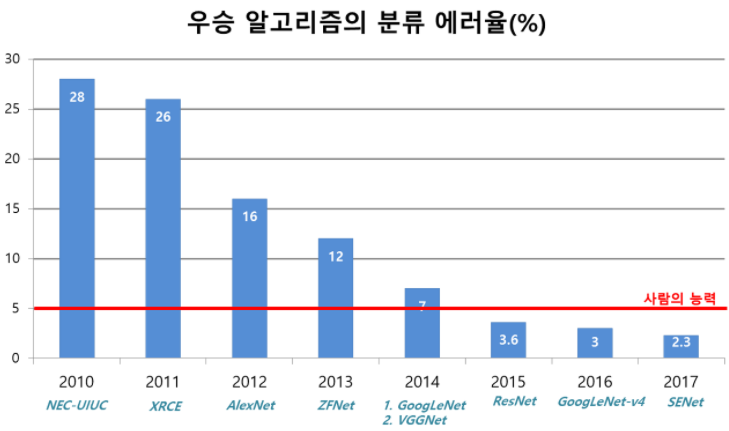

- 사진 출처: https://bskyvision.com/425


Lenet
--

LeNet은 Yann LeCun 교수가 제안한 최초의 CNN 모델입니다. 32 $\times$ 32 Input과 Convolution layer 2개, pooling layer 2개, Fully Connected Layer 3개를 갖고 있는데, 이 구조는 가장 기본적인 CNN구조로 사용되고 있습니다.

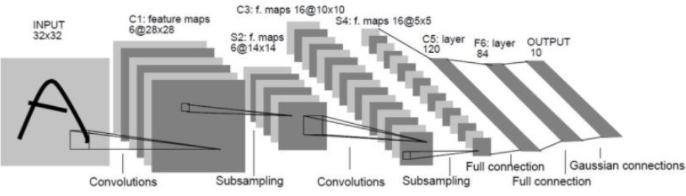

AlexNet
--

AlexNet은 224 $\times$ 224 크기의 RGB 3 Channel Image를 Input으로 사용했습니다. Activation 함수로는 ReLU를 사용했으며 Dropout과 Data Augmentation 등을 적용했습니다.

LeNet-5의 경우 풀링 커널이 움직이는 보폭인 sride를 커널사이즈보다 작게 하는 overlapping pooling을 적용했습니다. 

VGG
--

VGGNet 모델은 네트워크의 깊이를 중첩한다는 것이 특징입니다. 네트워크의 깊이를 깊게 만들기 위해 컨볼루션 필터커널의 사이즈는 가장 작은 $3\times3$으로 고정하였습니다. (필터커널의 사이즈가 크면 그만큼 이미지의 사이즈가 금방 축소되기 때문에 네트워크의 깊이를 충분히 깊게 만들기 불가능하기 때문입니다.)

Layer의 깊이에 다라 VGG16, VGG19 등으로 불리고 있습니다.



**VGG구조 예시 (VGG16)**

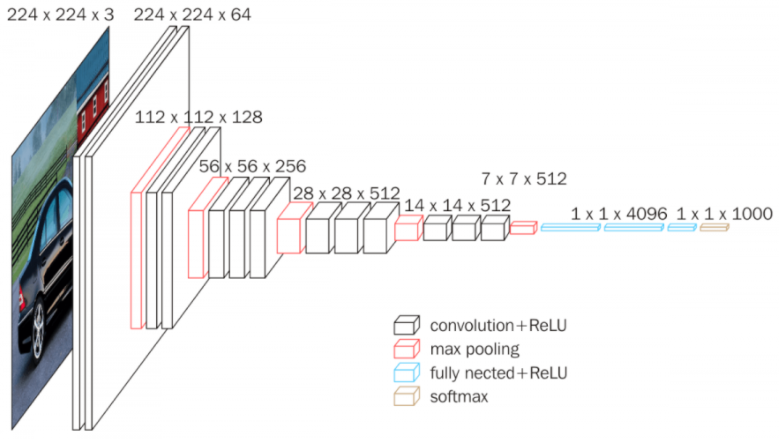

- 사진 출처: https://bskyvision.com/504?category=635506

**VGG16**

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

**VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
model = VGG19(weights='imagenet')
print(model.summary())

574726144/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

GooGLeNet
--

GoogLeNet은 Google + LeNet을 합친 말으로, 매우 복잡한 형태를 지니고 있습니다. GoogLeNet은 Inception 모듈이라는 개념을 CNN에 도입했습니다.

기존의 CNN 구조는 Convolution 다음의 Pooling Layer를 거치는 것이 일반적인데, Inception Model은 한 Layer 내에서 서로 다른 연산을 거친 후 Feature Map을 다시 합치는 방식입니다. 이러한 방식을 사용하면, 한 Feature Map에서 여러 Convolution을 적용할 수 있기 때문에, 작은 규모의 Feature, 비교적 큰 규모의 Feature를 한 번에 학습할 수 있다는 장점이 있습니다. GoogLeNet은 총 9개의 Inception Module로 구성되어 있습니다.

> GoogLeNet은 19층의 VGG19보다 좀 더 깊은 22층으로 구성되어 있습니다.

> GoogLeNe은 $1 \times 1$ 사이즈의 필터로 컨볼루션해준다. 그렇게 하는 이유는 특성맵의 갯수를 줄이기 위해서 이다. (연산량을 줄이면 네트워크의 깊이를 더 깊게 만들기에 유리하다.)

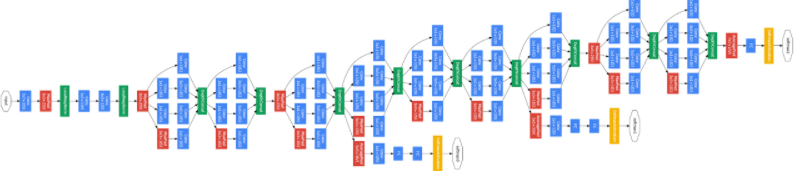

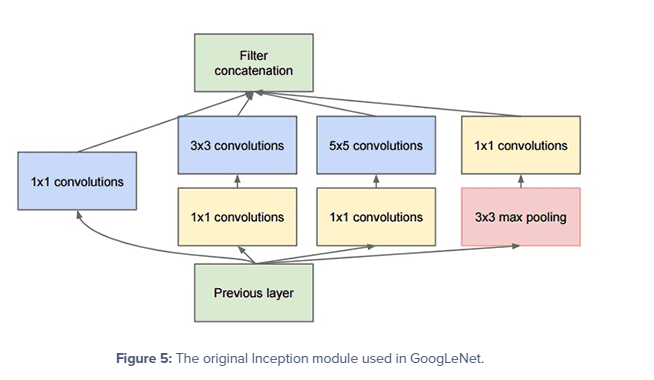

- GooGLeNet 구조


Resnet
--

ResNet은 Residual Block이라는 개념을 도입했는데, 이는 이전 Layer의 Feature Map을 다음 Layer의 Feature Map에 더해주는 개념입니다. 이를 "Skip Connection"이라고 합니다. 이를 통해 네트워크가 깊어짐에 따라 앞 단의 Layer에 대한 정보가 뒤의 Layer에서 희석되는 문제를 보완하였습니다.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')
print(model.summary())
# 너무 길어서 출력은 삭제

DenseNet
--

DenseNet은 ResNet의 확장된 버전이라 할 수 있습니다. DenseNet은 모든 Layer에 Skip Connection을 적용하는 모델입니다.

In [ ]:
from tensorflow.keras.applications import DenseNet201
model = DenseNet201(weights='imagenet')
print(model.summary())
# 너무 길어서 출력은 삭제

#CIFAR-10 데이터에 ResNet 설계해보기

In [ ]:
Batch_size=32
Epochs=10

train_dataset=datasets.CIFAR10(root="../data/CIFAR_10",
                             train=True, #학습용 데이터
                             download=True,
                             transform=transforms.ToTensor())
test_dataset=datasets.CIFAR10(root="../data/CIFAR_10",
                            train=False, #검증용 데이터
                            transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset, 
                                         batch_size=Batch_size,
                                         shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=Batch_size,
                                        shuffle=False)

In [ ]:
for (X_train, y_train) in train_loader:
  print("X_train", X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

X_train torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, in_planes, planes, stride=1):
    super(BasicBlock, self).__init__()
    self.conv1=nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn1=nn.BatchNorm2d(planes)
    self.conv2=nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn2=nn.BatchNorm2d(planes)

    self.shortcut=nn.Sequential()
    if stride != 1 or in_planes != planes:
      self.shortcut=nn.Sequential(
          nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
          nn.BatchNorm2d(planes))
      
  def forward(self, x):
    out=F.relu(self.bn1(self.conv1(x)))
    out=self.bn2(self.conv2(out))
    out += self.shortcut(x)
    out=F.relu(out)
    return out

class ResNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ResNet, self).__init__()
    self.in_planes=16

    self.conv1=nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1=nn.BatchNorm2d(16)
    self.layer1=self._make_layer(16,2,stride=1)
    self.layer2=self._make_layer(32,2, stride=2)
    self,layer3=self._make_layer(64,2, stride=2)
    self.linear=nn.Linear(64, num_classes)

  def _make_layer(self, planes, num_blocks, stride):
    strides=[stride]+[1]*(num_blocks -1)
    layers=[]
    for stride in strides:
      layers.append(BasicBlock(self.in_planes, planes, stride))
      self.in_planes=planes
    return nn.Sequential(*layers)
  def forwward(self, x):
    out=F.relu(self.bn1(self.conv1(x)))
    out=self.layer1(out)
    out=self.layer2(out)
    out=self.layer3(out)
    out=F.avg_pool2d(out, 8)
    out=out.view(out.size(0), -1)
    out=self.linear(out)
    return out

In [ ]:
model=ResNet().to(Device)

In [ ]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)
critertion=nn.CrossEntropyLoss()

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

#Transfer Learning (CIFAR 100)

전이학습(Transfer Learning): ImageNet 데이터를 미리 학습해 놓은 딥러닝 모델 (Pre-Trained Model)을 가져와 재학습(Fine-tuning)시키는 방법

In [ ]:
Batch_size=32
Epochs=10

train_dataset=datasets.CIFAR100(root="../data/CIFAR_100",
                             train=True, #학습용 데이터
                             download=True,
                             transform=transforms.ToTensor())
test_dataset=datasets.CIFAR100(root="../data/CIFAR_100",
                            train=False, #검증용 데이터
                            transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset, 
                                         batch_size=Batch_size,
                                         shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=Batch_size,
                                        shuffle=False)

In [ ]:
for (x_train, y_train) in train_loader:
    print('x_train: ', x_train.size(), 'type: ', x_train.type())
    print('y_train: ', y_train.size(), 'type: ', y_train.type())
    break

x_train:  torch.Size([32, 3, 32, 32]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


In [ ]:
def train(model, train_loader, optimizier, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image=image.to(Device)
    label=label.to(Device)
    optimizer.zero_grad()
    output=model(image)
    loss=critertion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(print("Train Epoch: {} [{}/{}({:.0f}%)] \t Train Loss: {:.6f}".format(Epoch, batch_idx*len(image), len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item())))

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for image, label in test_loader:
      image=image.to(Device)
      label=label.to(Device)
      output=model(image)
      test_loss += critertion(output, label).item()
      prediction=output.max(1, keepdim=True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy=100.*correct/len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
import torchvision.models as models
from torchsummary import summary

**VGG16**

In [ ]:
model=models.vgg16(pretrained=True)
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()
summary(model, input_size=(3,32,32))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [ ]:
for Epoch in range(1, Epochs+1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, test_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)] 	 Train Loss: 15.134471
None
Train Epoch: 1 [6400/50000(13%)] 	 Train Loss: 4.814626
None
Train Epoch: 1 [12800/50000(26%)] 	 Train Loss: 4.013838
None
Train Epoch: 1 [19200/50000(38%)] 	 Train Loss: 3.917497
None
Train Epoch: 1 [25600/50000(51%)] 	 Train Loss: 3.800452
None
Train Epoch: 1 [32000/50000(64%)] 	 Train Loss: 3.339292
None
Train Epoch: 1 [38400/50000(77%)] 	 Train Loss: 3.431261
None
Train Epoch: 1 [44800/50000(90%)] 	 Train Loss: 3.595875
None

 [EPOCH: 1], 	 Test Loss: 0.0869, 	 Test Accuracy: 30.14 

Train Epoch: 2 [0/50000(0%)] 	 Train Loss: 3.352081
None
Train Epoch: 2 [6400/50000(13%)] 	 Train Loss: 2.973732
None
Train Epoch: 2 [12800/50000(26%)] 	 Train Loss: 2.580588
None
Train Epoch: 2 [19200/50000(38%)] 	 Train Loss: 2.460018
None
Train Epoch: 2 [25600/50000(51%)] 	 Train Loss: 2.786450
None
Train Epoch: 2 [32000/50000(64%)] 	 Train Loss: 2.547004
None
Train Epoch: 2 [38400/50000(77%)] 	 Train Loss: 2.164568
None
Train Epoch: 2 [44800

**Resnet18**

In [ ]:
model=models.resnet18(pretrained=True)
model=model.to(Device)
optimizer=torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
critertion=nn.CrossEntropyLoss()
summary(model, input_size=(3,32,32))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [ ]:
for Epoch in range(1, Epochs+1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy=evaluate(model, test_loader)
  print("\n [EPOCH: {}], \t Test Loss: {:.4f}, \t Test Accuracy: {:.2f} \n".format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)] 	 Train Loss: 13.575915
None
Train Epoch: 1 [6400/50000(13%)] 	 Train Loss: 5.605192
None
Train Epoch: 1 [12800/50000(26%)] 	 Train Loss: 4.810371
None
Train Epoch: 1 [19200/50000(38%)] 	 Train Loss: 4.811520
None
Train Epoch: 1 [25600/50000(51%)] 	 Train Loss: 3.939523
None
Train Epoch: 1 [32000/50000(64%)] 	 Train Loss: 2.764563
None
Train Epoch: 1 [38400/50000(77%)] 	 Train Loss: 3.897504
None
Train Epoch: 1 [44800/50000(90%)] 	 Train Loss: 3.326032
None

 [EPOCH: 1], 	 Test Loss: 0.0914, 	 Test Accuracy: 29.26 

Train Epoch: 2 [0/50000(0%)] 	 Train Loss: 2.655997
None
Train Epoch: 2 [6400/50000(13%)] 	 Train Loss: 2.723541
None
Train Epoch: 2 [12800/50000(26%)] 	 Train Loss: 3.528827
None
Train Epoch: 2 [19200/50000(38%)] 	 Train Loss: 2.662588
None
Train Epoch: 2 [25600/50000(51%)] 	 Train Loss: 2.719599
None
Train Epoch: 2 [32000/50000(64%)] 	 Train Loss: 2.747137
None
Train Epoch: 2 [38400/50000(77%)] 	 Train Loss: 2.533410
None
Train Epoch: 2 [44800

#Object Detection

**이미지 분류 vs 객체 검출**

이미지 분류: 이미지 분류(image classification)는 한 장의 이미지를 알고리즘에 입력해주면, 그 이미지가 어떤 클래스 라벨에 속하는지 알려주는 것이다.

객체검출: 객체검출(Object Detection)은 이미지 내에서 알고리즘을 훈련시킬 대 사용된 클래스 라벨에 속하는 모든 물체를 검출하고, 그 위치들도 바운딩 박스로 알려준다. 

출처: https://bskyvision.com/413


**Bounding Box**

바운딩 박스는 특정 사물을 탐지하여 모델을 효율적으로 학습 할 수 있도록 도움을 주는 방법입니다. 객체 탐지 모델에서 바운딩 박스는 타겟 위치를 특정하기 위해 사용됩니다. 타겟 위치를 X와 Y축을 이용하여 사각형으로 표현합니다. 예를 들어, 바운딩 박스 값은 (X 최소값, Y 최소값, X 최대값, Y 최대값)으로 표현이 됩니다.

**Object Detection Tutorial(PyTorch를 활용한 딥러닝 튜토리얼: 의료용 마스크 탐지)**

> 객체 탐지 소개: https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch1-Object-Detection.html

> Faster R-CNN 실습: https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book/blob/master/book/chapters/object-detection/Ch5-Faster-R-CNN.ipynb